In [12]:
import sys
import os
import pandas as pd
import datetime as dt
from dotenv import load_dotenv
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
from sqlalchemy import create_engine
os.chdir('..')
from db_connection.connection import PostgresConnection

from src.df_cleaner import *
from src.df_outlier_handler import OutlierHandler


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
db = PostgresConnection(dbname='postgres', user='postgres', password='postgres')
db.connect()

# load BOA App review data 
query = "SELECT * FROM sub_data"
result = db.execute_query(query)

df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])

Connected to PostgreSQL database!


# General Statistics

In [4]:
df.size

4269

In [5]:
df.head()

channel_id        date  subscriber_count
0       None  2024-05-24              -1.0
1       None  2024-05-23              24.0
2       None  2024-05-22            -104.0
3       None  2024-05-21             -10.0
4       None  2024-05-20             104.0

In [6]:
df.shape

(1423, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channel_id        0 non-null      object 
 1   date              145 non-null    object 
 2   subscriber_count  145 non-null    float64
dtypes: float64(1), object(2)
memory usage: 33.5+ KB


In [8]:
df.describe()

subscriber_count
count        145.000000
mean         -21.896552
std          119.681796
min         -186.000000
25%          -83.000000
50%          -39.000000
75%            7.000000
max          669.000000

# Missing Values

In [8]:
percent_missing_values(df)

The dataset contains 93.21 % missing values.


In [9]:
df.isnull().sum()

channel_id          1423
date                1278
subscriber_count    1278
dtype: int64

In [10]:
df = df.fillna(value = 0)
df

channel_id        date  subscriber_count
0              0  2024-05-24              -1.0
1              0  2024-05-23              24.0
2              0  2024-05-22            -104.0
3              0  2024-05-21             -10.0
4              0  2024-05-20             104.0
...          ...         ...               ...
1418           0           0               0.0
1419           0           0               0.0
1420           0           0               0.0
1421           0           0               0.0
1422           0           0               0.0

[1423 rows x 3 columns]

In [11]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


# Univariate Analysis

In [13]:
unique_counts = df['subscriber_count'].nunique()
unique_counts

113

# Experiment

In [14]:
counts_df = df['subscriber_count'].value_counts()
counts_df

subscriber_count
 0.0      1278
 2.0         3
-75.0        3
 19.0        3
-104.0       3
          ... 
-83.0        1
 23.0        1
 11.0        1
-70.0        1
-1.0         1
Name: count, Length: 113, dtype: int64

# Outliers

In [17]:
user_engagement_df = df[['date','subscriber_count']]
user_engagement_df.head()

date  subscriber_count
0  2024-05-24              -1.0
1  2024-05-23              24.0
2  2024-05-22            -104.0
3  2024-05-21             -10.0
4  2024-05-20             104.0

In [19]:
outlier_handler = OutlierHandler(user_engagement_df)

<Axes: >

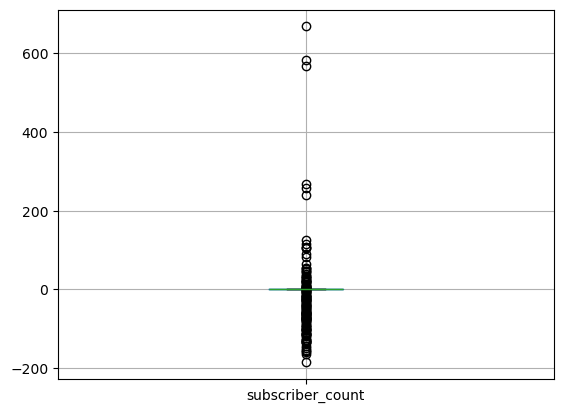

In [20]:
user_engagement_df.boxplot()